In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from dtw import dtw, dtw_ln
from testing import TestFactory
from models import Autoregression
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import distance

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
tests = TestFactory(random_state=42)
X = tests.set_sample(40)

In [11]:
ar_models = []
window_size = 10

for series in X:
    ar = Autoregression(series.loc[:, :"ECoG_ch3"], window_size)
    ar.fit(10)
    ar_models.append(ar.coeffecients())

Loss: 42837.242
Loss: 1580.146
Loss: 122990.750
Loss: 2242.432
Loss: 128354.211
Loss: 3143.390
Loss: 44068.770
Loss: 1532.654
Loss: 63820.445
Loss: 2616.681
Loss: 18152.092
Loss: 886.880
Loss: 53515.449
Loss: 1786.960
Loss: 75878.719
Loss: 5127.099
Loss: 51764.281
Loss: 1132.072
Loss: 146922.922
Loss: 3170.179
Loss: 32557.195
Loss: 1449.598
Loss: 51766.578
Loss: 3263.767
Loss: 29347.451
Loss: 1150.496
Loss: 79596.047
Loss: 4449.789
Loss: 69781.734
Loss: 1331.406
Loss: 22933.074
Loss: 2126.980
Loss: 31155.688
Loss: 1602.792
Loss: 63868.617
Loss: 4479.257
Loss: 55674.867
Loss: 5061.004
Loss: 59883.320
Loss: 6336.365
Loss: 45249.734
Loss: 2821.557
Loss: 120621.266
Loss: 5655.795
Loss: 76840.469
Loss: 1684.924
Loss: 77105.828
Loss: 2140.392
Loss: 19443.930
Loss: 1801.766
Loss: 37622.812
Loss: 3149.668
Loss: 39667.059
Loss: 3317.514
Loss: 44270.641
Loss: 2660.731
Loss: 10037.298
Loss: 1085.133
Loss: 15988.547
Loss: 1317.083
Loss: 49738.934
Loss: 1424.608
Loss: 12754.095
Loss: 827.038
Loss: 

In [12]:
coeffs = []
for series in ar_models:
    coeff = [np.array(np.concatenate([x.detach().numpy() for x in chanel], axis=0)) for chanel in series]
    coeffs.append(np.concatenate(coeff, axis=0))
coeffs = np.array(coeffs)

In [13]:
Z = linkage(coeffs, metric=distance.euclidean)

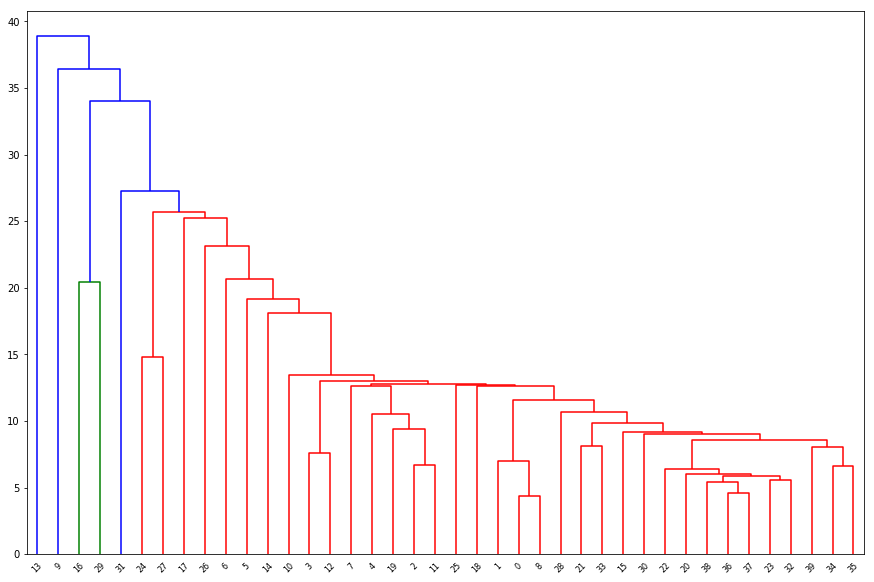

In [14]:
fig = plt.figure(figsize=(15, 10))
dn = dendrogram(Z)

In [15]:
cluster_num = 3
clusters_labels = fcluster(Z, cluster_num, criterion='maxclust')

In [16]:
tests.show_clustered(Z, clusters_labels, label=2, ch=1)

AttributeError: 'TestFactory' object has no attribute 'show_clustered'